# Logistic Regression Project

In this project, we will be working with the UCI adult dataset. We will be attempting to predict if people in the data set belong in a certain class by salary, either making $50k or less, or making more than $50k per year

Typically, most of your time is spent cleaning data, not running a few lines of code that build your model. Thie project will try to emulate that by showing different issues that may arise when cleaning data.

### Get the Data.
__Read in the adult_sal.csv file and set it to the data frame called adult__

In [102]:
adult <- read.csv("adult_sal.csv")

__Call the head of adult__

In [103]:
head(adult)

,X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


__According to the head, we have an extra index value. Remove that using dplyr__

In [104]:
library(dplyr)

In [105]:
adult <- select(adult, -X)

__Check the head, str, and summary of adult__

In [106]:
head(adult)
str(adult)
summary(adult)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40

      age                 type_employer       fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                    marital     
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

## Data Cleaning
__Notice that we have a lot of columns that are categorical factors. A lot of these columns have too many factors that may be necessary. In this data cleaning section, we'll try to clean these columns up by reducing the number of factors__

### type_employer column
__Use table() to check out the frequency of the type_employer column.__

In [107]:
table(adult$type_employer)


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14 

__How many Null values are there for type_employer? What are the two smallest groups?__


In [108]:
# 1836 Null Values
#
# Never Worked and Without Pay are the smallest groups

__Combine these two smallest groups into a single group called "Unemployed". There are lots of ways to do this, so feel free to get creative. Hint: It may be helpful to convert these objects into character data types (as.character() and then use sapply with a custom function)__



In [109]:
unemp <- function(job){
    job <- as.character(job)
    if (job =='Never-worked' | job =='Without-pay'){
        return('Unemployed')
    }else{
        return(job)
    }
}

In [110]:
adult$type_employer <- sapply(adult$type_employer,unemp)

table(adult$type_employer)


               ?      Federal-gov        Local-gov          Private 
            1836              960             2093            22696 
    Self-emp-inc Self-emp-not-inc        State-gov       Unemployed 
            1116             2541             1298               21 

__Combine State and Local gov jobs into a category called SL-gov and combine self-employed jobs into a category called self-emp.__

In [111]:
group_emp <- function(job){
    if (job =='Local-gov' | job =='State-gov'){
        return('SL-gov')
    }else if(job =='Self-emp-inc' | job =='Self-emp-not-inc'){
        return("self-emp")
    }else{
        return(job)
    }
}

In [112]:
adult$type_employer <- sapply(adult$type_employer, group_emp)

In [113]:
table(adult$type_employer)


          ? Federal-gov     Private    self-emp      SL-gov  Unemployed 
       1836         960       22696        3657        3391          21 

### Maritial Column
__Use table() to look at te marital column__

In [114]:
table(adult$marital)


             Divorced     Married-AF-spouse    Married-civ-spouse 
                 4443                    23                 14976 
Married-spouse-absent         Never-married             Separated 
                  418                 10683                  1025 
              Widowed 
                  993 

__Reduce this to three groups:__

- __Married__
- __Not-Married__
- __Never-Married__

In [115]:
group_marital <- function(mar){
    mar <- as.character(mar)
    
    #Not married
    if( mar == "Separated" | mar == "Widowed" | mar == "Divorced"){
        return('Not-Married')
        
    #Never-Married    
    }else if(mar == 'Never-married'){
        return(mar)
    
    #Married   
    }else{
        return('Married')
    }     
}

In [116]:
adult$marital <- sapply(adult$marital,group_marital)

In [117]:
table(adult$marital)


      Married Never-married   Not-Married 
        15417         10683          6461 

### Country Column
__Check the country column using table()__

In [118]:
table(adult$country)


                         ?                   Cambodia 
                       583                         19 
                    Canada                      China 
                       121                         75 
                  Columbia                       Cuba 
                        59                         95 
        Dominican-Republic                    Ecuador 
                        70                         28 
               El-Salvador                    England 
                       106                         90 
                    France                    Germany 
                        29                        137 
                    Greece                  Guatemala 
                        29                         64 
                     Haiti         Holand-Netherlands 
                        44                          1 
                  Honduras                       Hong 
                        13                         20 
         

__Group these countries together however you see fit. You have flexibility here because there is no right/wrong way to do this, possibly group by continents. You should be able to reduce the number of groups here significantly though.__

In [119]:
levels(adult$country)

[1] "?"                          "Cambodia"                  
 [3] "Canada"                     "China"                     
 [5] "Columbia"                   "Cuba"                      
 [7] "Dominican-Republic"         "Ecuador"                   
 [9] "El-Salvador"                "England"                   
[11] "France"                     "Germany"                   
[13] "Greece"                     "Guatemala"                 
[15] "Haiti"                      "Holand-Netherlands"        
[17] "Honduras"                   "Hong"                      
[19] "Hungary"                    "India"                     
[21] "Iran"                       "Ireland"                   
[23] "Italy"                      "Jamaica"                   
[25] "Japan"                      "Laos"                      
[27] "Mexico"                     "Nicaragua"                 
[29] "Outlying-US(Guam-USVI-etc)" "Peru"                      
[31] "Philippines"                "Poland"                    
[33] "Portugal"                   "Puerto-Rico"               
[35] "Scotland"                   "South"                     
[37] "Taiwan"                     "Thailand"                  
[39] "Trinadad&Tobago"            "United-States"             
[41] "Vietnam"                    "Yugoslavia"

In [120]:
Asia <- c('China','Hong','India','Iran','Cambodia','Japan', 'Laos' ,
          'Philippines' ,'Vietnam' ,'Taiwan', 'Thailand')

North.America <- c('Canada','United-States','Puerto-Rico' )

Europe <- c('England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
            'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia')

Latin.and.South.America <- c('Columbia','Cuba','Dominican-Republic','Ecuador',
                             'El-Salvador','Guatemala','Haiti','Honduras',
                             'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru',
                            'Jamaica','Trinadad&Tobago')
Other <- c('South')

In [121]:
group_country <- function(ctry){
    if (ctry %in% Asia){
        return('Asia')
    }else if (ctry %in% North.America){
        return('North.America')
    }else if (ctry %in% Europe){
        return('Europe')
    }else if (ctry %in% Latin.and.South.America){
        return('Latin.and.South.America')
    }else{
        return('Other')      
    }
}

In [122]:
adult$country <- sapply(adult$country,group_country)

In [123]:
table(adult$country)


                   Asia                  Europe Latin.and.South.America 
                    671                     521                    1301 
          North.America                   Other 
                  29405                     663 

__Check the str() of adult again. Make sure any of the columns we changed have factor levels with factor()__

In [124]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "SL-gov" "self-emp" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married" "Not-Married" "Married" ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : 

In [125]:
adult$type_employer <-sapply(adult$type_employer,factor)
adult$country <-sapply(adult$country,factor)
adult$marital <-sapply(adult$marital,factor)

In [126]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 6 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 

__We could still play around with education and occupation to try to reduce the number of factors for those columns, but let's go ahead and move on to dealing with the missing data. Feel free to group those columns as well and see how they effect your model.__

### Missing Data

__Notice that we have a lot of ? values in the data frame. Convert them to NA values.__

In [127]:
adult[adult == '?'] <- NA

__Using table() on a column with NA values should now not display those NA values, instead you'll just see 0 for ?. Refactor these columns (may take awhile).__



In [128]:
table(adult$type_employer)


     SL-gov    self-emp     Private Federal-gov           ?  Unemployed 
       3391        3657       22696         960           0          21 

In [129]:
adult$type_employer <- sapply(adult$type_employer,factor)
adult$country <- sapply(adult$country,factor)
adult$marital <- sapply(adult$marital,factor)
adult$occupation <- sapply(adult$occupation,factor)

__Use the missmap function from the Amelia package. Can you figure out what its doing and how to use it?__

In [130]:
library(Amelia)

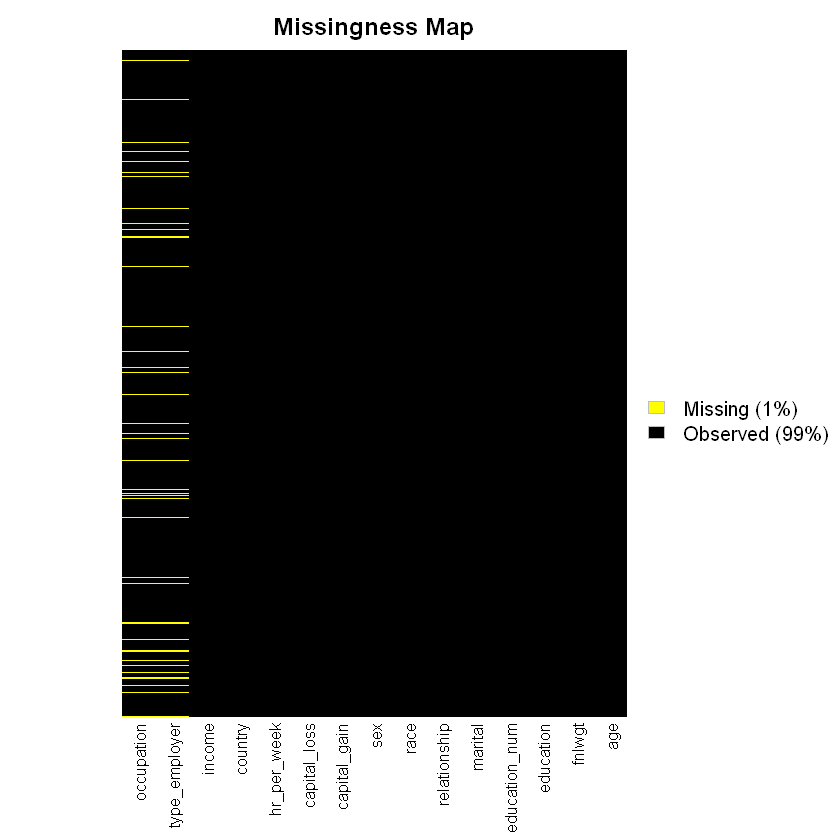

In [131]:
missmap(adult,y.at=c(1),y.labels = c(''),col=c('yellow','black'))

__Use na.omit() to omit NA data from the adult data frame. Note, it really depends on the situation and your data to judge whether or not this is a good decision. You shouldn't always just drop NA values.__



In [132]:
adult <- na.omit(adult)

__Use missmap() to check that all the NA values were in fact dropped.__



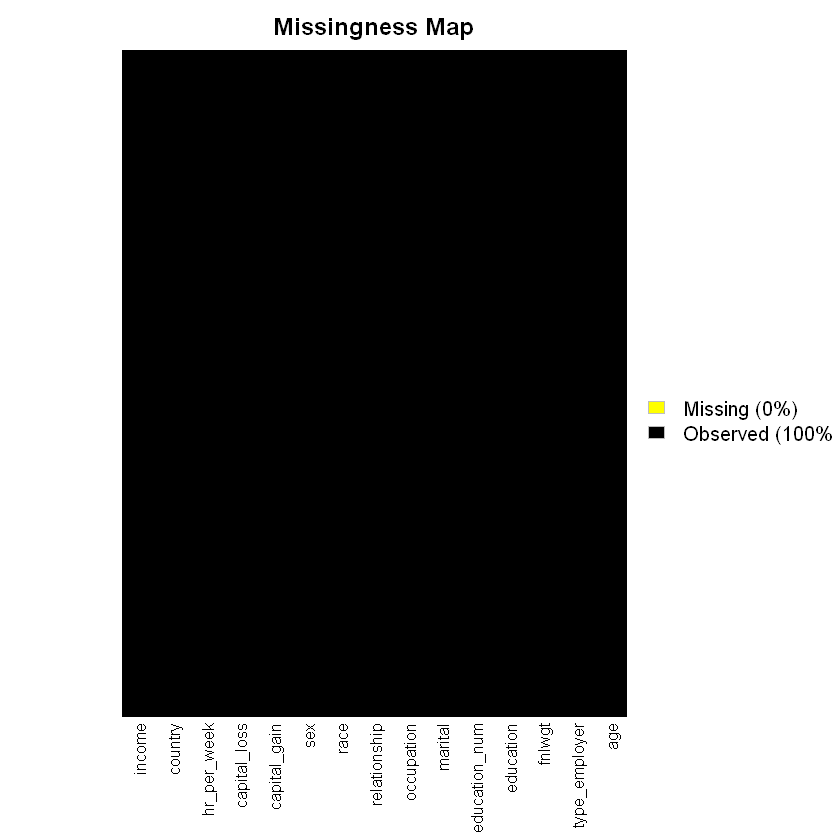

In [133]:
missmap(adult,y.at=c(1),y.labels = c(''),col=c('yellow','black'))

## Exploratory Data Analysis
__Check the str() of the data.__

In [134]:
str(adult)

'data.frame':	30718 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 5 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 14 levels "Adm-clerical",..: 1 2 3 3 4 2 5 2 4 2 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $

Use ggplot to create a histogram of ages, colored by income.

In [135]:
library(ggplot2)
library(dplyr)

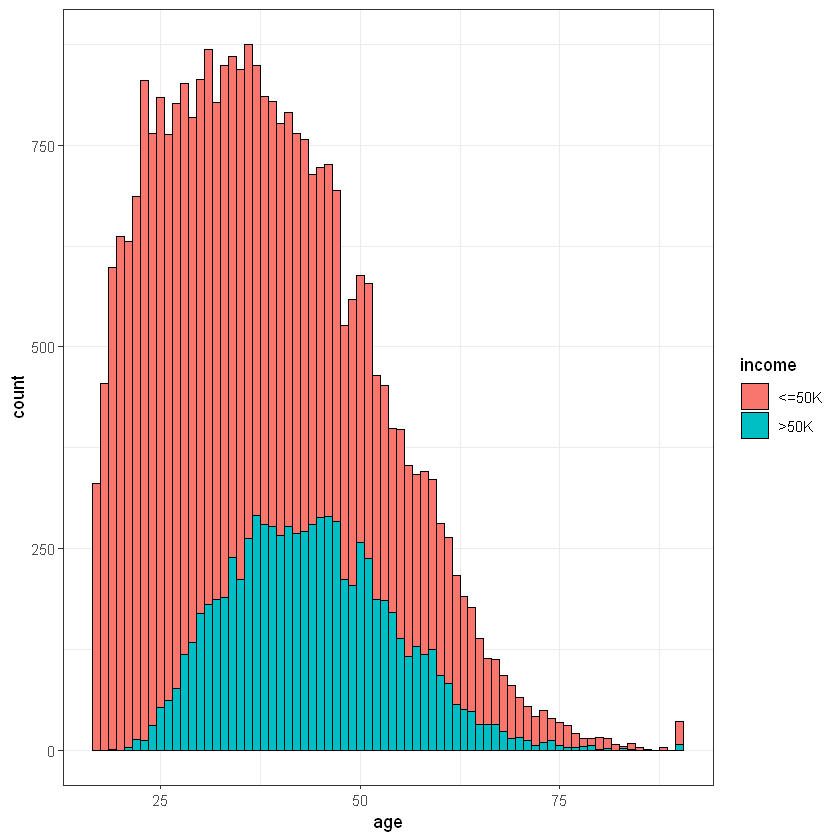

In [136]:
ggplot(adult,aes(age)) + geom_histogram(aes(fill=income),color='black',binwidth=1) + theme_bw()

__Plot a histogram of hours worked per week__

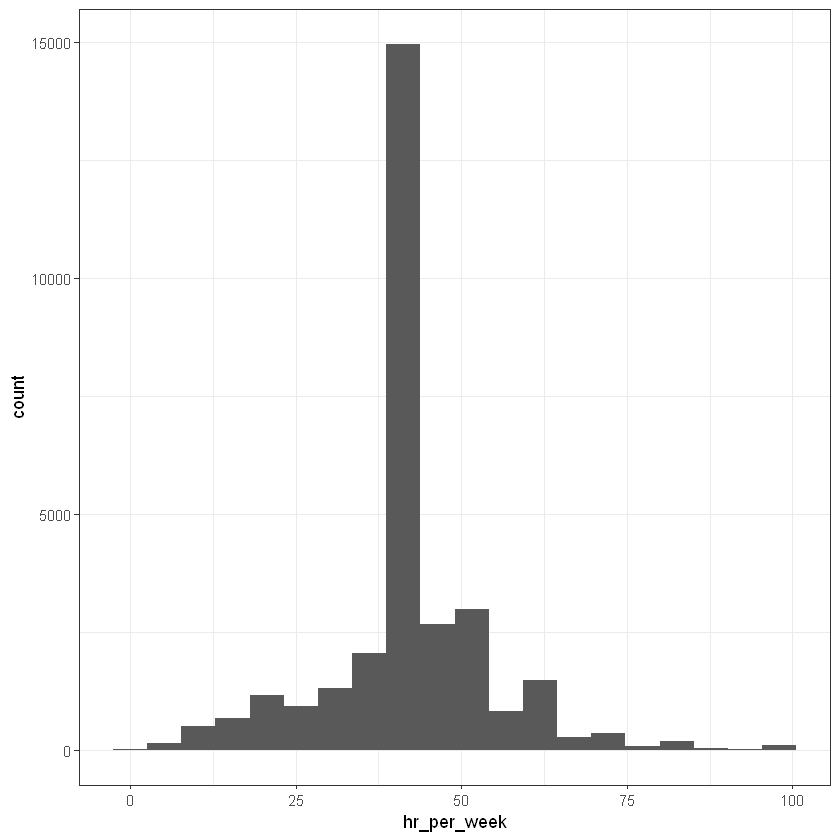

In [137]:
ggplot(data = adult, aes( x = hr_per_week) ) + geom_histogram(bins = 20) + theme_bw()

__Rename the country column to region column to better reflect the factor levels.__

In [138]:
names(adult)[names(adult)== "country"] <- "region"

In [139]:
str(adult)

'data.frame':	30718 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 5 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 14 levels "Adm-clerical",..: 1 2 3 3 4 2 5 2 4 2 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $

__Create a barplot of region with the fill color defined by  income class. Try to figure out how to rotate the x axis text for readability__

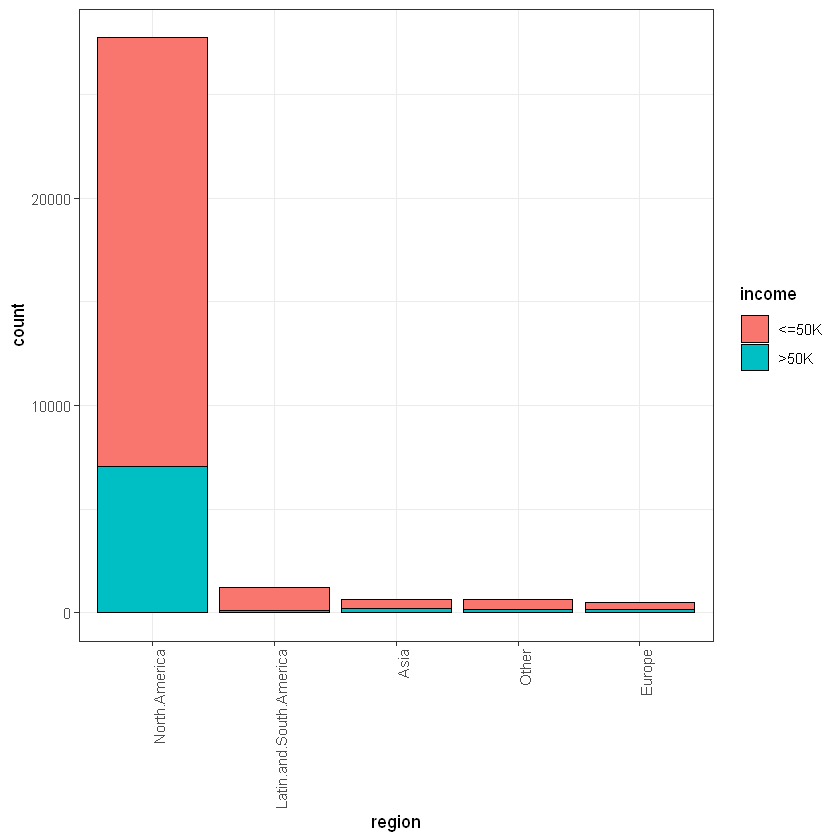

In [140]:
ggplot(adult, aes(region) ) + 
    geom_bar( aes( fill = income), color = 'black' ) +
    theme_bw() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Building a Model
Now it's time to build a model to classify people into two groups: Above 50k and Below 50K.

## Logistic Regression

Refer to the previous notebook or ISLR if you need help

Logistic Regression is a type of classification model. In classification models, we attempt to predict the outcome of categorical dependent values, using one or more independent variables. The independent variable can be either categorical or numerical.

Logistic regression is based on the logistic function, which always takes values between 0 and 1. Replacining the dependent variable of the logistic function with a linear combination of dependent variables we intend to use for regression, we arrive at the formula for logistic regression.

__Double check the head() of adult to make sure we have a good overview before building the model.__

In [141]:
head(adult)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin.and.South.America,<=50K
6,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North.America,<=50K


## Train Test Split
__Split the data into a training and test set using caTools as done in previous lectures.__ 

In [142]:
library(caTools)

In [143]:
set.seed(100)

sample <- sample.split(adult$income, SplitRatio = 0.70)

train = subset(adult, sample == TRUE)
test = subset(adult, sample == FALSE)


__Use all the features to train the glm() model on the training data set, pass the argument family = binomial(logit) into the glm function__

In [144]:
model = glm( income ~ . , family = binomial(logit), data = train)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = income ~ ., family = binomial(logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0615  -0.5154  -0.1965  -0.0006   3.6455  

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -7.125e+00  4.243e-01 -16.791  < 2e-16 ***
age                            2.640e-02  2.004e-03  13.172  < 2e-16 ***
type_employerself-emp         -8.153e-02  8.985e-02  -0.907 0.364158    
type_employerPrivate           1.932e-01  7.260e-02   2.661 0.007795 ** 
type_employerFederal-gov       5.888e-01  1.248e-01   4.716 2.40e-06 ***
type_employerUnemployed       -1.268e+01  2.382e+02  -0.053 0.957563    
fnlwgt                         7.441e-07  2.065e-07   3.603 0.000315 ***
education11th                  1.584e-02  2.584e-01   0.061 0.951109    
education12th                  4.324e-01  3.233e-01   1.337 0.181060    
education1st-4th           

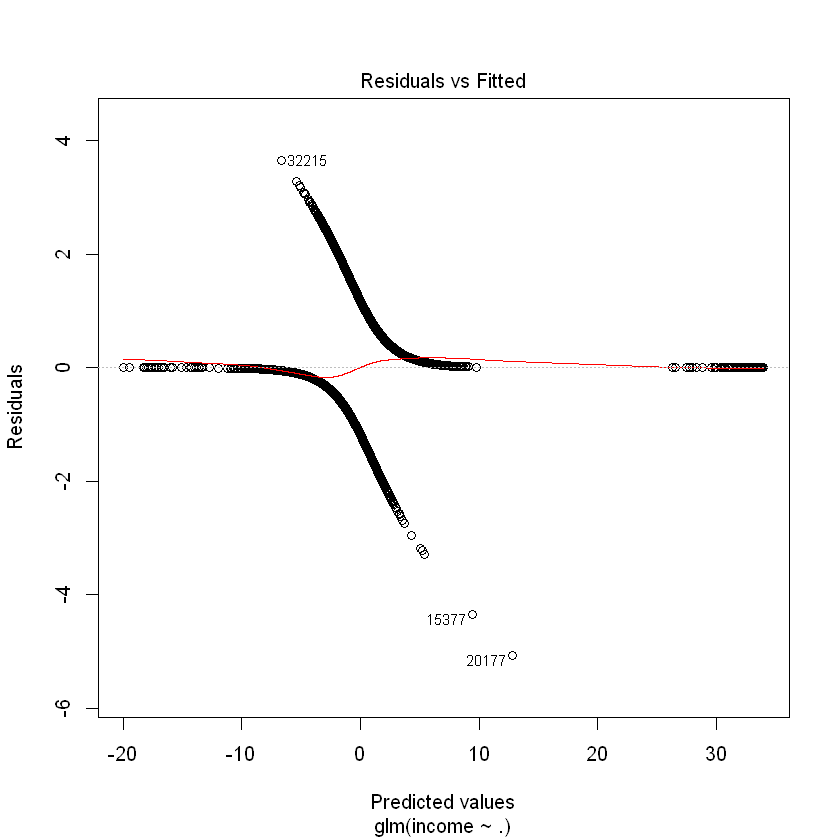

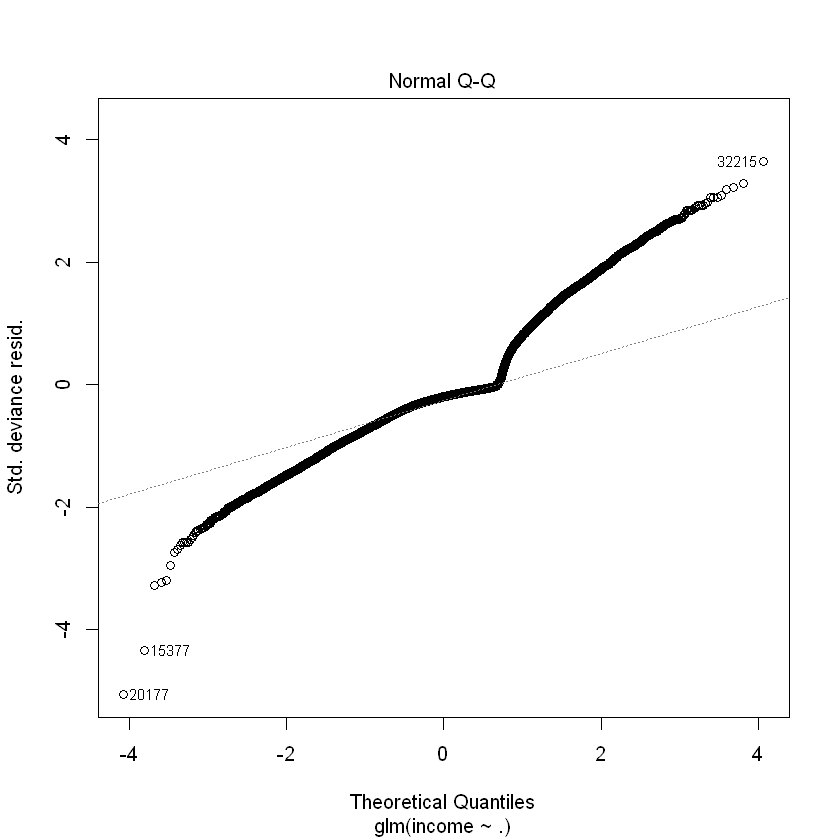

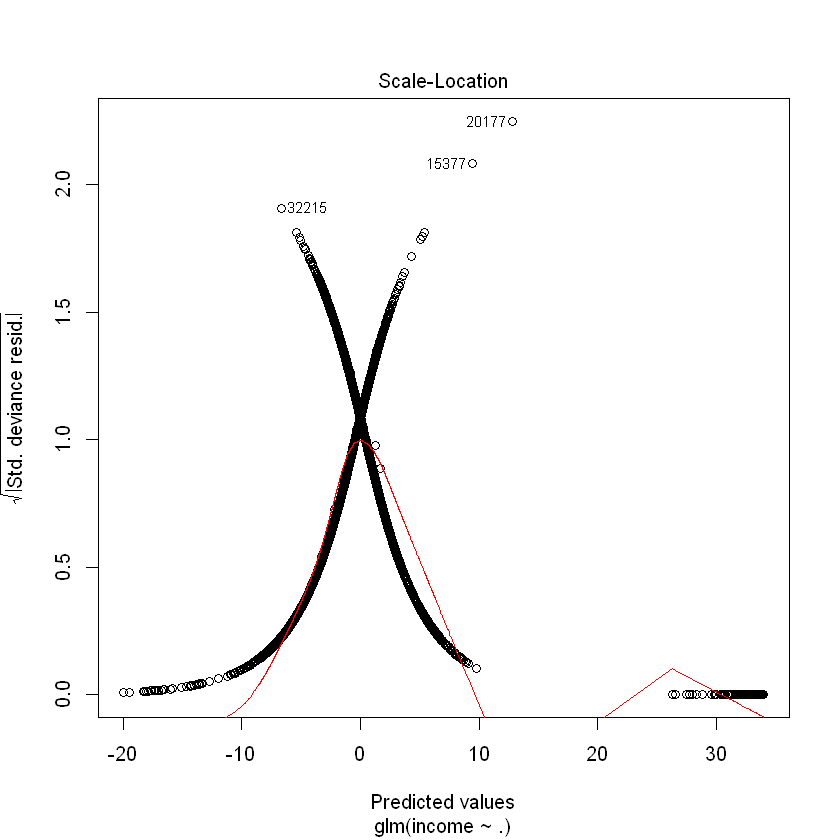

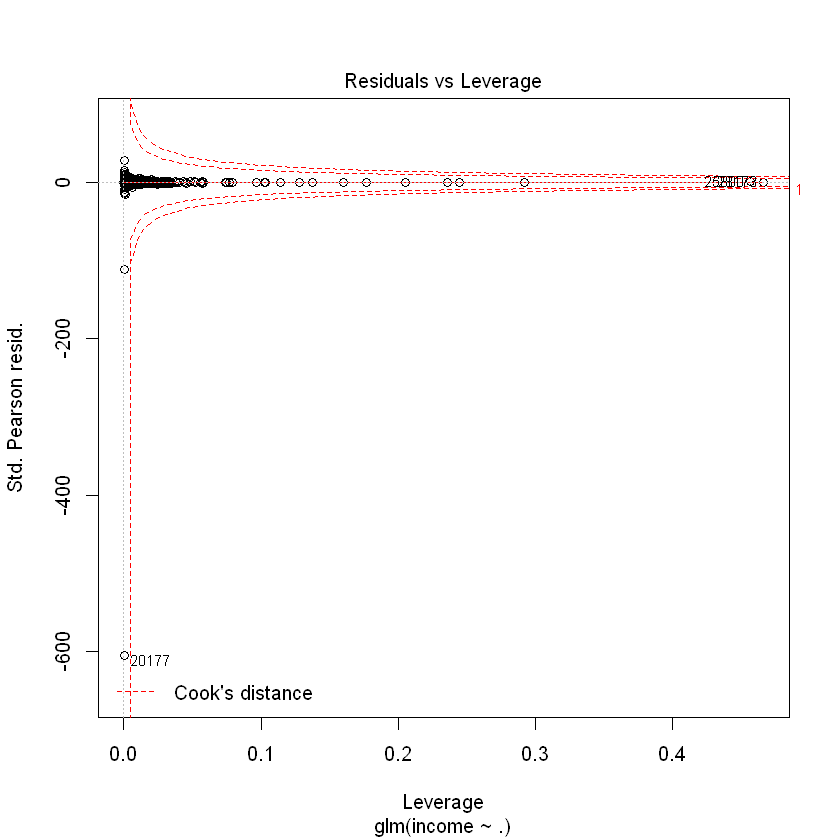

In [145]:
summary(model)
plot(model)

__We have still a lot of features! Some important, some not so much. R comes with an awesome function called step(). The step() function iteratively tries to remove predictor variables from the model in an attempt to delete variables that do not significantly add to the fit. How does it do this? It uses AIC. Read the wikipedia page for AIC if you want to further understand this, you can also check out help(step). This level of statistics is outside the scope of this project assignment so let's keep moving along__

__Use new.model <- step(your.model.name) to use the step() function to create a new model__

In [146]:
new.step.model <- step(model)

Start:  AIC=14123.66
income ~ age + type_employer + fnlwgt + education + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess


Step:  AIC=14123.66
income ~ age + type_employer + fnlwgt + education + marital + 
    occupation + relationship + race + sex + capital_gain + capital_loss + 
    hr_per_week + region



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                Df Deviance   AIC
- race           4    14023 14123
<none>                14016 14124
- fnlwgt         1    14028 14134
- region         4    14040 14140
- type_employer  4    14060 14160
- marital        2    14061 14165
- sex            1    14101 14207
- age            1    14191 14297
- capital_loss   1    14220 14326
- relationship   5    14263 14361
- hr_per_week    1    14259 14365
- occupation    13    14481 14563
- education     15    14689 14767
- capital_gain   1    15238 15344


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=14123.25
income ~ age + type_employer + fnlwgt + education + marital + 
    occupation + relationship + sex + capital_gain + capital_loss + 
    hr_per_week + region



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                Df Deviance   AIC
<none>                14023 14123
- fnlwgt         1    14036 14134
- region         4    14052 14144
- type_employer  4    14067 14159
- marital        2    14069 14165
- sex            1    14110 14208
- age            1    14200 14298
- capital_loss   1    14228 14326
- relationship   5    14272 14362
- hr_per_week    1    14267 14365
- occupation    13    14494 14568
- education     15    14706 14776
- capital_gain   1    15243 15341



Call:
glm(formula = income ~ age + type_employer + fnlwgt + education + 
    marital + occupation + relationship + sex + capital_gain + 
    capital_loss + hr_per_week + region, family = binomial(logit), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0555  -0.5154  -0.1978  -0.0007   3.6702  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -6.668e+00  3.312e-01 -20.133  < 2e-16 ***
age                            2.655e-02  2.003e-03  13.256  < 2e-16 ***
type_employerself-emp         -7.340e-02  8.972e-02  -0.818 0.413317    
type_employerPrivate           1.982e-01  7.251e-02   2.734 0.006254 ** 
type_employerFederal-gov       5.794e-01  1.245e-01   4.653 3.27e-06 ***
type_employerUnemployed       -1.266e+01  2.384e+02  -0.053 0.957652    
fnlwgt                         7.356e-07  2.043e-07   3.600 0.000318 ***
education11th                  1.717e-02  2.585e-01   0.066 0.9

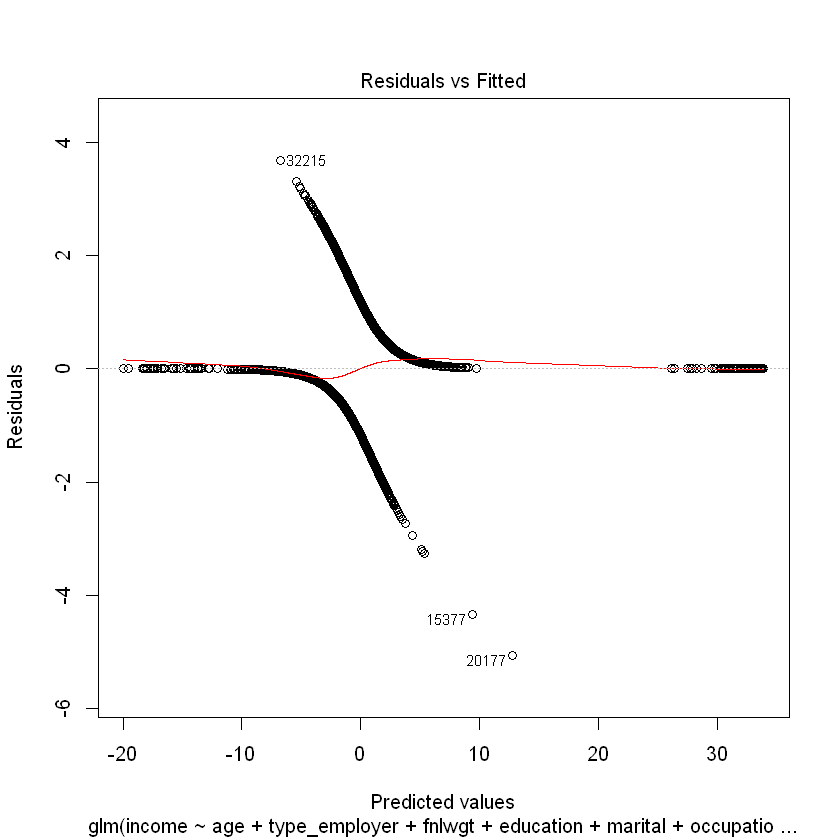

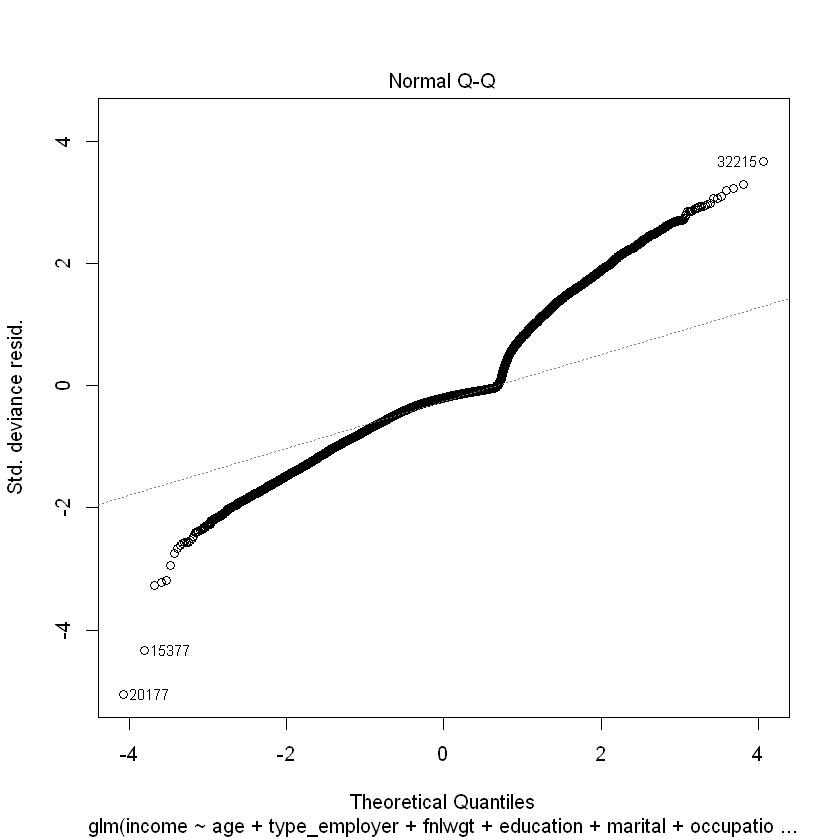

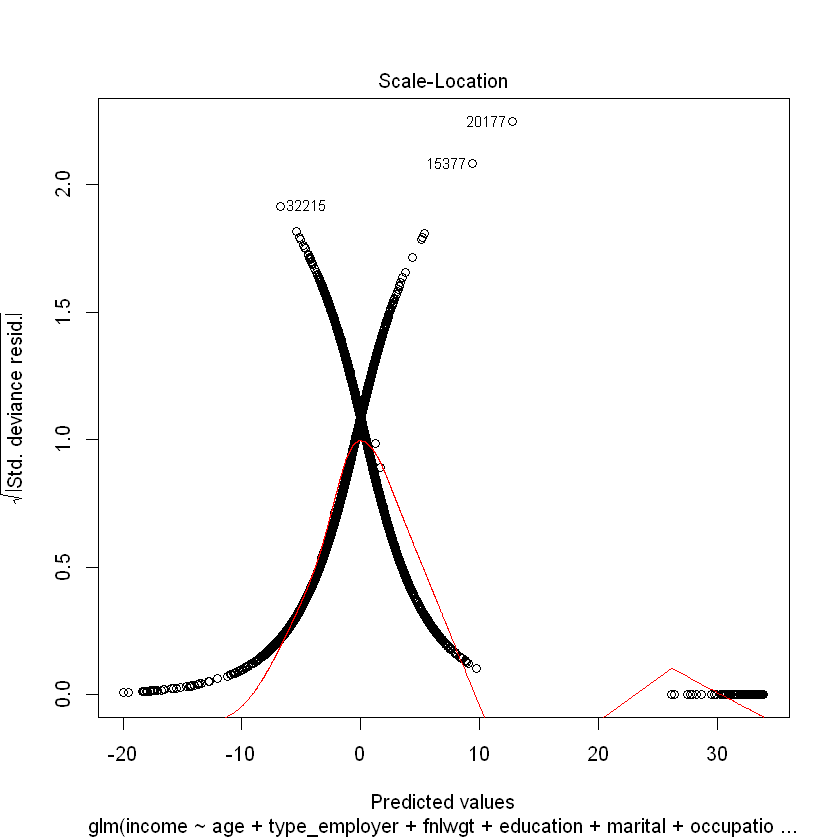

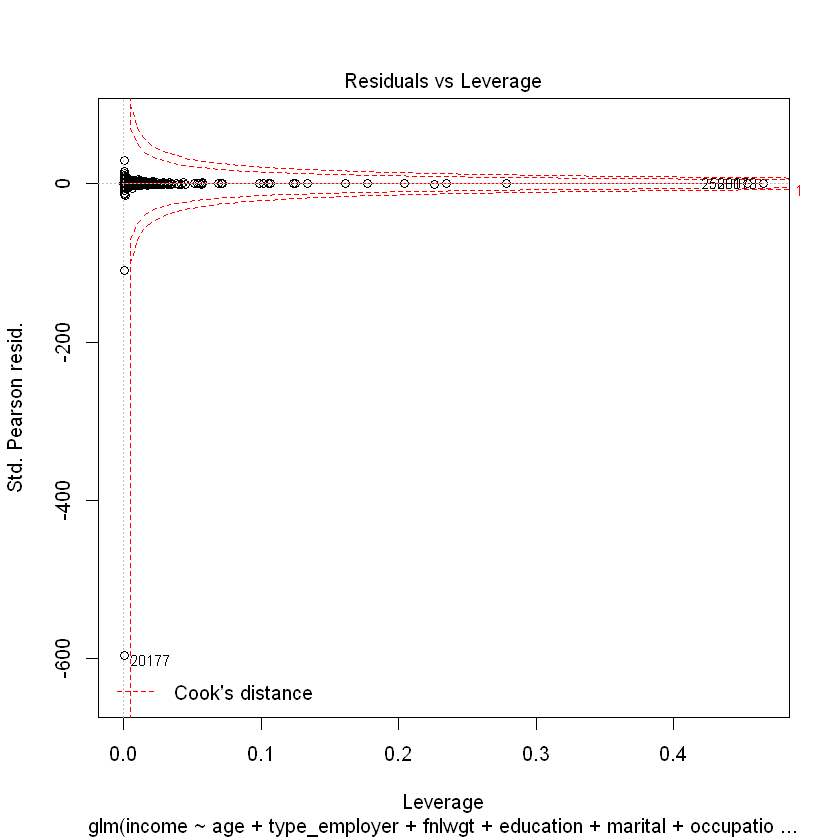

In [147]:
summary(new.step.model)
plot(new.step.model)

__You should have noticed that the step() function kept all the features used previously! While we used the AIC criteria to compare models, there are other criteria we could have used. If you want you can try reading about the variable inflation factor (VIF) and vif() function to explore other options for comparison criteria. In the meantime let's continue on and see how well our model performed against the test set.__

__Create a confusion matrix using the predict function with type='response' as an argument inside of that function.__

In [148]:
test$predicted.income = predict(model, newdata=test, type="response")
table(test$income, test$predicted.income > 0.5)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

       
        FALSE TRUE
  <=50K  6416  504
  >50K    899 1396

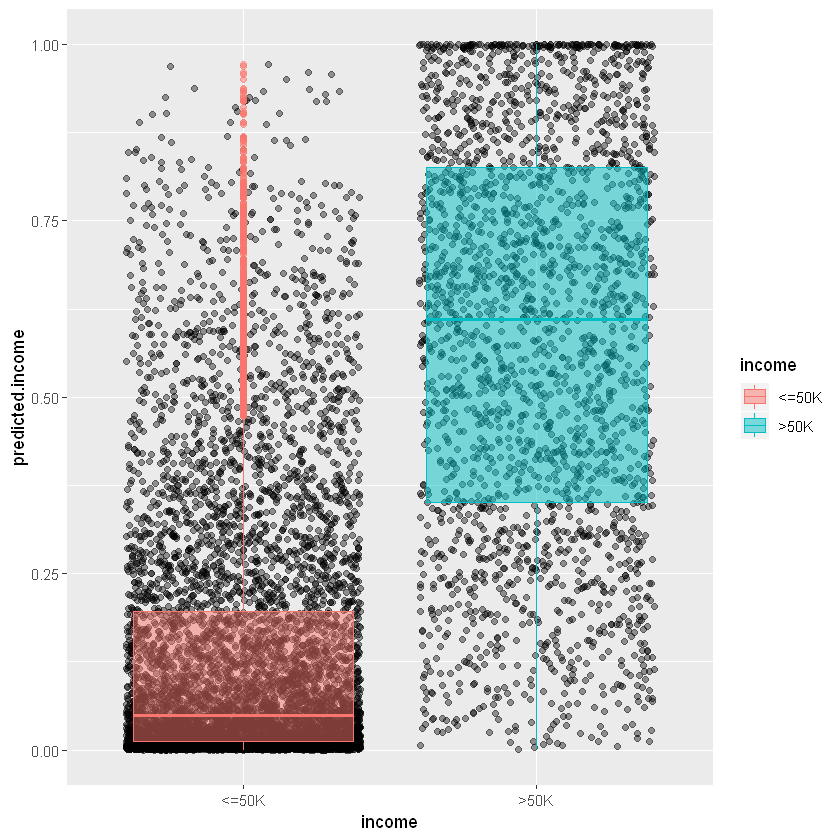

In [149]:
ggplot( data = test , aes( x = income, y = predicted.income) ) + geom_jitter(alpha = 0.4) + geom_boxplot(aes(color = income, fill = income), alpha = 0.5)

__You'll notice we have a rank deficient fit. Find out more about what issues this may cause by reading [this stackexchange post](http://stats.stackexchange.com/questions/35071/what-is-rank-deficiency-and-how-to-deal-with-it).__

__What was the accuracy of our model?__

In [150]:
( 6416 + 1396 ) / (6416 + 504 + 899 + 1396)

[1] 0.8477482

__Calculate other measures of performance like, recall or precision.___



In [151]:
# Recall 
6416 / (6416 + 899)

[1] 0.8771018

In [152]:
# Precision
6416 / (6416 + 504)

[1] 0.9271676